# Inclusão de Bibliotecas

In [2]:
from os import listdir # Biblioteca responsável por capturar informações de arquivos dentro de um diretório.

import os 

import pathlib

import numpy as np # Cálculos numéricos

import pandas as pd # Criação e manipulação de dataframes.

import seaborn as sns # Biblioteca para plotar diversos tipos de gráficos.

import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.
plt.style.use('ggplot')


import wave # Biblioteca com métodos que permitam converter dados raw em .wav

import struct # Biblioteca responsável por trabalhar com dados raw.

import librosa # A python package for music and audio analysis.

import librosa.display # librosa package visualization.

import random # Random functions.

# Pré Processamento
from sklearn.preprocessing import LabelEncoder

# Split do dataset em treino e teste
from sklearn.model_selection import train_test_split, cross_validate, LeaveOneOut

# Aplicação de PCA no dataset.
from sklearn.decomposition import PCA

# Algoritmo de Regressão Logística
from sklearn.linear_model import LogisticRegression

#Algoritmo de SVM
from sklearn.svm import SVC

#Algoritmo de Decision Tree
from sklearn.tree import DecisionTreeClassifier

from tensorflow import keras

import csv

# Métricas de erro para validação do modelo gerado. 
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix


pd.set_option('display.max_rows', None) # Mostra todas as linhas do dataframe.
pd.set_option('display.max_columns', None) # Mostra todas as colunas do dataframe.


# Funções para Criação do Dataframe

In [3]:
####### Funções necessárias para gerar o dataset conforme o status da marcha e profile_id: ###########

def findCSV_filename(path_to_dir, suffix = ".csv"):
    """
    Retorna todos os arquivos com extensão .csv em uma lista. 
    Os elementos são ordenados em ordem crescente.
    """
    
    # Lista os arquivos no diretório path_to_dir 
    filenames = listdir(path_to_dir) 
    
    # Retorna uma lista com os arquivos com final .csv em ordem crescente baseado no nome do arquivo.
    return sorted([filename for filename in filenames if filename.endswith( suffix )])

# Separa todos os arquivos .csv em listas diferentes conforme a categoria da marcha.
def FormatScreeningFilenames(filenames):
    """
    Separa todos os arquivos .csv em listas diferentes conforme a categoria da marcha.
    """
    if (len(filenames) == 0):
        return "It was not found any csv file at the location specified"
    else:
    
        MS_filenames = [] # Lista da categoria "Marcha Soldado"
        MN_filenames = [] # Lsta da categoria "Marcha Normal"
        MM_filenames = [] # Lista da categoria "Marcha Mancando"
        MP_filenames = [] # Lista da categoria "Marcha a Definir"


        # Lista os arquivos no diretório path_to_dir
        for filename in filenames:

            if (filename.find("MS", 4, 6) != -1): # Se encontrar "MS" no nome do arquivo:
                MS_filenames.append(filename) # Gera lista com todos os "MS" .csv

                # Incrementa numeração de acordo com o número do último arquivo
                lastMS_fileNumber = int(findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/MS")[-1][:4])+1


            elif (filename.find("MN", 4, 6) != -1): # Se encontrar "MN" no nome do arquivo:
                MN_filenames.append(filename) # Gera lista com todos os "MN" .csv

                # Incrementa numeração de acordo com o número do último arquivo na pasta MN
                lastMN_fileNumber = int(findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/MN")[-1][:4])+1

            elif (filename.find("MM", 4, 6) != -1): # Se encontrar "MM" no nome do arquivo:
                MM_filenames.append(filename) # Gera lista com todos os "MM" .csv

                # Incrementa numeração de acordo com o número do último arquivo na pasta MM
                lastMM_fileNumber = int(findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/MM")[-1][:4])+1

            else: # Se encontrar "MP" no nome do arquivo:
                MP_filenames.append(filename) # Gera lista com todos os "MP" .csv

                # Incrementa numeração de acordo com o número do último arquivo na pasta MD
                lastMP_fileNumber = int(findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/MP")[-1][:4])+1



        for filename in MS_filenames: 

            # Move os arquivos MM para a pasta de destino MS.
            os.rename("/home/trs/Gait_Project/GaitDataset/Triagem/{}".format(filename),
                      "/home/trs/Gait_Project/GaitDataset/Triagem/{}".format('{:0>4}'.format(lastMS_fileNumber)
                                                                           +filename[4:]))
            lastMS_fileNumber+=1 


        for filename in MM_filenames:

            # Move os arquivos MM para a pasta de destino MM.
            os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/{}".format(filename),
                      "/home/trs/Gait_Project/GaitDataset/Triagem/MM/{}".format('{:0>4}'.format(lastMM_fileNumber)
                                                                           +filename[4:]))
            lastMM_fileNumber+=1

        for filename in MN_filenames:

            # Move os arquivos MN para a pasta de destino MN.
            os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/{}".format(filename),
                      "/home/trs/Gait_Project/GaitDataset/Triagem/MN/{}".format('{:0>4}'.format(lastMN_fileNumber)
                                                                           +filename[4:]))
            lastMN_fileNumber+=1

        for filename in MP_filenames:

            # Move os arquivos MP para a pasta de destino MP.
            os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/{}".format(filename),
                      "/home/trs/Gait_Project/GaitDataset/Triagem/MP/{}".format('{:0>4}'.format(lastMP_fileNumber)
                                                                           +filename[4:]))
            lastMP_fileNumber+=1
            
        


def getProfile_id(filenames):
    """
    Retorna uma lista que contém o profile_id de todos os arquivos com extensão .csv
    """
    
    profile_id=[]
    
    for item in filenames: # Para cada arquivo na lista filenames,
        
        for i in range(500): # Dentro de cada arquivo, faça 500 vezes:
            
            profile_id.append(item[:4]) #Pega os 4 primeiros caracteres e armazena na lista profile_id.
            
    return profile_id 


def getGait_status(filenames):
    """
    Retorna uma lista com o status da marcha de cada profile_id diferente.  
    """
    
    gaitStatus=[]

    for item in filenames: # Para cada arquivo na lista filenames,
        
        for i in range(500): # Dentro de cada arquivo, faça 500 vezes:
            
            gaitStatus.append(item[4:6]) # Pega o quinto caractere e armazena na lista gaitStatus.
            
    return gaitStatus


def createDataframe(filenames):
    """
    Cria um dataframe vertical com todos os arquivos .csv dados na lista filenames.
    """

    i = 1
    
    df = pd.read_csv(filenames[0]) # Inicializa o dataframe com o primeiro arquivo .csv da lista filenames.
    
    while i < len(filenames): # Percorre toda a lista filenames.
        
        df_temporary = pd.read_csv(filenames[i]) # Cria um dataframe temporario.
        
        df = pd.concat([df,df_temporary]).reset_index(drop=True) # Concatena no dataframe o dataframe temporário. 
        
        i += 1
        
    return(df)

 
def insertColumns(df, gaitStatus, profile_id):
    """
    Insere as colunas 'Gait_Status' e 'Profile_ID' no dataframe vertical.
    """
    
    df['Gait_Status'] = gaitStatus # Passa todos os elementos, com respectiva ordem, para a coluna especificada.
    
    df['Profile_ID'] = profile_id  # Passa todos os elementos, com respectiva ordem, para a coluna especificada.
    
    return df


def createHorizontalDataframe(df, filenames):
    """
    Cria um Dataframe horizontal com base no dataframe vertical.
    """
    
    profile_id=[]
    
    for item in filenames: # Para cada item na lista filenames: 
        profile_id.append(item[:4]) # Pega os 4 primeiros caracteres e armazena numa lista profile_id.

    gaitStatus=[]
    for item in filenames: # Para cada item na lista filenames:
        gaitStatus.append(item[4:6]) # Pega o quinto caractere e armazena numa lista gaitStatus


    xac = []
    for i in range(500): # Faça 500 vezes: 
        xac.append("Xac{:0>3}".format(i)) # xac = [ Xac000, Xac001, ... , Xacc499]
    yac = []
    for i in range(500): # Faça 500 vezes: 
        yac.append("Yac{:0>3}".format(i)) # yac = [ Yac000, Yac001, ... , Yacc499]
    zac = []
    for i in range(500):
        zac.append("Zac{:0>3}".format(i))
        
    xang = []
    for i in range(500):
        xang.append("RotX{:0>3}".format(i))
        
    yang = []
    for i in range(500):
        yang.append("RotY{:0>3}".format(i))
        
    zang = []
    for i in range(500):
        zang.append("RotZ{:0>3}".format(i))
        
    tempo = []
    for i in range(500):
        tempo.append("Tempo{:0>3}".format(i))
        
    columns_label = [xac,yac,zac,xang,yang,zang,tempo]
    
    columns_df = []
    
    columns_df.append('profile_ID') # Acrescenta a coluna 'profile_ID'
    columns_df.append('Gait Status') # Acrescenta a coluna 'Gait Status'

    for item in columns_label: # Para cada coluna,
        for i in range(500): # Faça 500 vezes
            columns_df.append(item[i]) # Ao final, temos uma lista com todos as colunas rotuladas adequadamente.

    columns_labelstring = ['xac','yac','zac','xang','yang','zang','tempo']
    
    
    

    df_horizontal = pd.DataFrame(columns = columns_df) # Cria as colunas do dataframe com a correta rotulação.
    
    count_concat = 0
    
    j = 0
    
    k = 500
    while count_concat < len(filenames): # Enquanto não concatenar todos os arquivos da lista filenames,
        vetorzao = []
        vetorzao.append(profile_id[count_concat]) # Pega o ID dentro da lista profile_id.
        
        vetorzao.append(gaitStatus[count_concat]) # Pega o estado da marcha dentro da lista gaitStatus.

        for s in range(len(columns_labelstring)): # Percorre todo a lista columns_labelstring.
            
            for i in range(j, k): 
                vetorzao.append(dataframe['{}'.format(columns_labelstring[s])][i])    
        df_horizontalbuffer = pd.DataFrame([vetorzao], columns = columns_df)
        df_horizontal = pd.concat([df_horizontal,df_horizontalbuffer]).reset_index(drop=True)
        j += 500
        k += 500
        count_concat += 1
    return df_horizontal



In [21]:
filenames = findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem")
FormatScreeningFilenames(filenames)

        
        


'It was not found any csv file at the location specified'

# Criação do Dataframe Vertical

In [2]:
filenames = findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/full_Dataset")

gaitStatus = getGait_status(filenames)

profile_id = getProfile_id(filenames)

dataframe = createDataframe(filenames)



NameError: name 'findCSV_filename' is not defined

In [4]:
dataframe.shape

(420000, 8)

In [5]:
dataframe = insertColumns(dataframe,gaitStatus,profile_id)


In [6]:
dataframe.head()

,xac,yac,zac,xang,yang,zang,tempo,amostra,Gait_Status,Profile_ID
0,-702,-1478,9018,-894,215,1752,1,0,MM,0001
1,-68,-1829,9071,-925,186,1822,7377,1,MM,0001
2,910,-2249,9155,-947,166,1874,17226,2,MM,0001
3,1703,-2587,9460,-964,180,1902,27396,3,MM,0001
4,1896,-3158,9593,-967,224,1921,37314,4,MM,0001


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420000 entries, 0 to 419999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   xac          420000 non-null  int64 
 1   yac          420000 non-null  int64 
 2   zac          420000 non-null  int64 
 3   xang         420000 non-null  int64 
 4   yang         420000 non-null  int64 
 5   zang         420000 non-null  int64 
 6   tempo        420000 non-null  int64 
 7   amostra      420000 non-null  int64 
 8   Gait_Status  420000 non-null  object
 9   Profile_ID   420000 non-null  object
dtypes: int64(8), object(2)
memory usage: 32.0+ MB


# Criação do Dataframe Horizontal

In [4]:
option = input("\nDigite a opção desejada: \n\t 0 - Criar um novo dataframe\n\t 1 - Importar um dataframe existente\n")
print("Opção selecionada: {}".format(option))
if (option == "0"):
    df = createHorizontalDataframe(dataframe, filenames)
elif (option == "1"):
    df = pd.read_csv("/home/rtiagos/PAIC/Gait_Project/GaitDataset/Triagem/full_Dataset/dataframe/gait_dataset.csv")



Digite a opção desejada: 
	 0 - Criar um novo dataframe
	 1 - Importar um dataframe existente
1
Opção selecionada: 1


In [5]:
df.head()

profile_ID Gait Status  Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  \
0           1          MM    -702     -68     910    1703    1896    1764   
1           1          MN   -3581   -4655   -3121   -1726    -216    1781   
2           1          MP   -5418   -4456   -4391   -3160    -943     144   
3           1          MS   10608    9584    9256    9384    9868    9701   
4           2          MM     381     494     348     658     605     529   

   Xac006  Xac007  Xac008  Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  \
0    1891    2102    2127    2507    2820    3043    3202    3116    3154   
1    1607    -273   -1382   -1475   -1618   -1746   -1859   -1791   -1672   
2    -802    -189    1239    2138    2355    1216    1757    2944    3764   
3   10049   10253   10193   10196   10167   10035    9021    8960    8332   
4     568    1064     896     247     338     384     518    1237    1415   

   Xac015  Xac016  Xac017  Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  \
0    3684    3623    5383    6687    7671    8700    9988   10665   10693   
1   -1342    -949    -935    -885    -288    -606      72    1135     714   
2    2239   -1264   -1487    -990    2916    3915    3050    4347    6872   
3   -6195   28394   28766  -22716    7324   29498   24645   -8979  -25836   
4    1684    1463    1356    1250    1208    1495    2286    2408    2742   

   Xac024  Xac025  Xac026  Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  \
0   11149   11636   10034   -7287  -26909  -19601    5958    8969    -942   
1     991    1497    1554    2632    2448    2319    2289    2145    2083   
2   10110   11748   13050   12057   11569   11397   11986   11661   11445   
3  -21115   -4268    5394    5907    3365    2691    -386   -3566   -4766   
4    1869     573    -384     657     865    -789   -2978   -5740   -8395   

   Xac033  Xac034  Xac035  Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  \
0   -4681    1704    5704    4495    1310     166    -896   -2227   -1675   
1    2292    1997    1550    1747    1686    1764    1643    1218    1228   
2   11741   12129   11734   11478   10937   10481    9934    9393    8952   
3   -4024   -2564   -1418    -944    -273    1042     969    -524   -2886   
4  -10432   -9845   -2107    9999    9889    7824    9652   10055    3393   

   Xac042  Xac043  Xac044  Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  \
0      48     706    -229   -1506   -1402    -489    -181    -261     -22   
1    1450    1729    1765    2302    2233    1916    2128    2795    2686   
2    8655    7897    6427    4218    2166    1498    1001     634     349   
3   -4227   -3537   -2720    -656     699     542    -241     480     843   
4   -3674  -11796   -9270   -7188  -10351   -9514   -7574   -6060   -4189   

   Xac051  Xac052  Xac053  Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  \
0     106    -300     -54     -11     191     387     780    1137     828   
1    1743    2024    1860    -668   -2069   -3099   -5204   -9375   -9698   
2     284     305     210    -198  -11240  -32176  -31907  -19306    8925   
3     198    -170    -245    -377    -214    -300    -180    -100     477   
4   -2603   -1967   -2028   -1770   -1172    -474     220     705     920   

   Xac060  Xac061  Xac062  Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  \
0     902     843     605     601     469     575     898    1207    1609   
1   -4032    8704   10506    6388    4405    1555     102     832     928   
2  -31448   23943  -15386  -21317  -12340    -325   10043   14078    6413   
3     602      42      -8     717    1536    1695    1608    1910    2351   
4    1918    3060    3233    2848    2241    2163    2066    2680    3358   

   Xac069  Xac070  Xac071  Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  \
0    1770    1831    1604    1462    1568    1847    2120    2332    2325   
1     749    3690    8169    3806    1072     595     322    -839   -1494   
2    -205    -485     848     143   -1921   -2841     324    3955   

In [6]:
# Salvar dataframe as csv

# df.to_csv(r'/home/trs/Gait_Project/GaitDataset/Triagem/full_Dataset/dataframe/gait_dataset.csv', index = False)

In [7]:
# Transformar a feature categórica 'Gait Status' em resposta binária. Normal = 1 -> I = 0 e vice-versa.
df_with_dummies = pd.get_dummies(df, columns= ['Gait Status'], prefix = 'Gait_Status', drop_first= True)
df_with_dummies.head()


profile_ID  Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  Xac006  Xac007  \
0           1    -702     -68     910    1703    1896    1764    1891    2102   
1           1   -3581   -4655   -3121   -1726    -216    1781    1607    -273   
2           1   -5418   -4456   -4391   -3160    -943     144    -802    -189   
3           1   10608    9584    9256    9384    9868    9701   10049   10253   
4           2     381     494     348     658     605     529     568    1064   

   Xac008  Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  Xac015  Xac016  \
0    2127    2507    2820    3043    3202    3116    3154    3684    3623   
1   -1382   -1475   -1618   -1746   -1859   -1791   -1672   -1342    -949   
2    1239    2138    2355    1216    1757    2944    3764    2239   -1264   
3   10193   10196   10167   10035    9021    8960    8332   -6195   28394   
4     896     247     338     384     518    1237    1415    1684    1463   

   Xac017  Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  Xac024  Xac025  \
0    5383    6687    7671    8700    9988   10665   10693   11149   11636   
1    -935    -885    -288    -606      72    1135     714     991    1497   
2   -1487    -990    2916    3915    3050    4347    6872   10110   11748   
3   28766  -22716    7324   29498   24645   -8979  -25836  -21115   -4268   
4    1356    1250    1208    1495    2286    2408    2742    1869     573   

   Xac026  Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  Xac033  Xac034  \
0   10034   -7287  -26909  -19601    5958    8969    -942   -4681    1704   
1    1554    2632    2448    2319    2289    2145    2083    2292    1997   
2   13050   12057   11569   11397   11986   11661   11445   11741   12129   
3    5394    5907    3365    2691    -386   -3566   -4766   -4024   -2564   
4    -384     657     865    -789   -2978   -5740   -8395  -10432   -9845   

   Xac035  Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  Xac042  Xac043  \
0    5704    4495    1310     166    -896   -2227   -1675      48     706   
1    1550    1747    1686    1764    1643    1218    1228    1450    1729   
2   11734   11478   10937   10481    9934    9393    8952    8655    7897   
3   -1418    -944    -273    1042     969    -524   -2886   -4227   -3537   
4   -2107    9999    9889    7824    9652   10055    3393   -3674  -11796   

   Xac044  Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  Xac051  Xac052  \
0    -229   -1506   -1402    -489    -181    -261     -22     106    -300   
1    1765    2302    2233    1916    2128    2795    2686    1743    2024   
2    6427    4218    2166    1498    1001     634     349     284     305   
3   -2720    -656     699     542    -241     480     843     198    -170   
4   -9270   -7188  -10351   -9514   -7574   -6060   -4189   -2603   -1967   

   Xac053  Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  Xac060  Xac061  \
0     -54     -11     191     387     780    1137     828     902     843   
1    1860    -668   -2069   -3099   -5204   -9375   -9698   -4032    8704   
2     210    -198  -11240  -32176  -31907  -19306    8925  -31448   23943   
3    -245    -377    -214    -300    -180    -100     477     602      42   
4   -2028   -1770   -1172    -474     220     705     920    1918    3060   

   Xac062  Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  Xac069  Xac070  \
0     605     601     469     575     898    1207    1609    1770    1831   
1   10506    6388    4405    1555     102     832     928     749    3690   
2  -15386  -21317  -12340    -325   10043   14078    6413    -205    -485   
3      -8     717    1536    1695    1608    1910    2351    2178    2731   
4    3233    2848    2241    2163    2066    2680    3358    3233    3212   

   Xac071  Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  Xac078  Xac079  \
0    1604    1462    1568    1847    2120    2332    2325    2463    2239   
1    8169    3806    1072     595     322    -839   -1494   -2619   -2728   
2     848     143   -1921   -2841     324   

In [8]:
tempo_drop = df_with_dummies.loc[:,'Tempo000':'Tempo499']

df_for_modeling= df_with_dummies.drop(['profile_ID', 'Gait_Status_MN', 'Gait_Status_MS', 'Gait_Status_MP'],
                         axis = 1) # Elimina as feature 'profile_ID' e Gait_Status_N

df_for_modeling = df_for_modeling.drop(tempo_drop, axis = 1) # Elimina as features de step time.

df_for_modeling.head()  # df_pca contém apenas os atributos agora



Xac000  Xac001  Xac002  Xac003  Xac004  Xac005  Xac006  Xac007  Xac008  \
0    -702     -68     910    1703    1896    1764    1891    2102    2127   
1   -3581   -4655   -3121   -1726    -216    1781    1607    -273   -1382   
2   -5418   -4456   -4391   -3160    -943     144    -802    -189    1239   
3   10608    9584    9256    9384    9868    9701   10049   10253   10193   
4     381     494     348     658     605     529     568    1064     896   

   Xac009  Xac010  Xac011  Xac012  Xac013  Xac014  Xac015  Xac016  Xac017  \
0    2507    2820    3043    3202    3116    3154    3684    3623    5383   
1   -1475   -1618   -1746   -1859   -1791   -1672   -1342    -949    -935   
2    2138    2355    1216    1757    2944    3764    2239   -1264   -1487   
3   10196   10167   10035    9021    8960    8332   -6195   28394   28766   
4     247     338     384     518    1237    1415    1684    1463    1356   

   Xac018  Xac019  Xac020  Xac021  Xac022  Xac023  Xac024  Xac025  Xac026  \
0    6687    7671    8700    9988   10665   10693   11149   11636   10034   
1    -885    -288    -606      72    1135     714     991    1497    1554   
2    -990    2916    3915    3050    4347    6872   10110   11748   13050   
3  -22716    7324   29498   24645   -8979  -25836  -21115   -4268    5394   
4    1250    1208    1495    2286    2408    2742    1869     573    -384   

   Xac027  Xac028  Xac029  Xac030  Xac031  Xac032  Xac033  Xac034  Xac035  \
0   -7287  -26909  -19601    5958    8969    -942   -4681    1704    5704   
1    2632    2448    2319    2289    2145    2083    2292    1997    1550   
2   12057   11569   11397   11986   11661   11445   11741   12129   11734   
3    5907    3365    2691    -386   -3566   -4766   -4024   -2564   -1418   
4     657     865    -789   -2978   -5740   -8395  -10432   -9845   -2107   

   Xac036  Xac037  Xac038  Xac039  Xac040  Xac041  Xac042  Xac043  Xac044  \
0    4495    1310     166    -896   -2227   -1675      48     706    -229   
1    1747    1686    1764    1643    1218    1228    1450    1729    1765   
2   11478   10937   10481    9934    9393    8952    8655    7897    6427   
3    -944    -273    1042     969    -524   -2886   -4227   -3537   -2720   
4    9999    9889    7824    9652   10055    3393   -3674  -11796   -9270   

   Xac045  Xac046  Xac047  Xac048  Xac049  Xac050  Xac051  Xac052  Xac053  \
0   -1506   -1402    -489    -181    -261     -22     106    -300     -54   
1    2302    2233    1916    2128    2795    2686    1743    2024    1860   
2    4218    2166    1498    1001     634     349     284     305     210   
3    -656     699     542    -241     480     843     198    -170    -245   
4   -7188  -10351   -9514   -7574   -6060   -4189   -2603   -1967   -2028   

   Xac054  Xac055  Xac056  Xac057  Xac058  Xac059  Xac060  Xac061  Xac062  \
0     -11     191     387     780    1137     828     902     843     605   
1    -668   -2069   -3099   -5204   -9375   -9698   -4032    8704   10506   
2    -198  -11240  -32176  -31907  -19306    8925  -31448   23943  -15386   
3    -377    -214    -300    -180    -100     477     602      42      -8   
4   -1770   -1172    -474     220     705     920    1918    3060    3233   

   Xac063  Xac064  Xac065  Xac066  Xac067  Xac068  Xac069  Xac070  Xac071  \
0     601     469     575     898    1207    1609    1770    1831    1604   
1    6388    4405    1555     102     832     928     749    3690    8169   
2  -21317  -12340    -325   10043   14078    6413    -205    -485     848   
3     717    1536    1695    1608    1910    2351    2178    2731    3659   
4    2848    2241    2163    2066    2680    3358    3233    3212    2975   

   Xac072  Xac073  Xac074  Xac075  Xac076  Xac077  Xac078  Xac079  Xac080  \
0    1462    1568    1847    2120    2332    2325    2463    2239    2088   
1    3806    1072     595     322    -839   -1494   -2619   -2728   -1505   
2     143   -1921   -2841     324    3955    3968    2312     575   

# Transformar Dados Raw em Arquivo de Aúdio WAV
### Procedimentos
1. Serão gerados 6 novos arquivos .wav a partir de cada data point do dataset atual. Esses novos arquivos são referentes aos eixos X,Y e Z do acelerômetro e giroscópio.


In [17]:
np.array([2,4]) + np.array([2,5])

array([4, 9])

In [188]:
len((np.array(df.loc[0,'Xac000':'Xac499'])
                      + np.array(df.loc[0, 'Yac000':'Yac499'])
                      + np.array(df.loc[0, 'Zac000':'Zac499'])
                      + np.array(df.loc[0, 'RotX000':'RotX499'])
                      + np.array(df.loc[0, 'RotY000':'RotY499'])
                      + np.array(df.loc[0, 'RotZ000':'RotZ499'])))

500

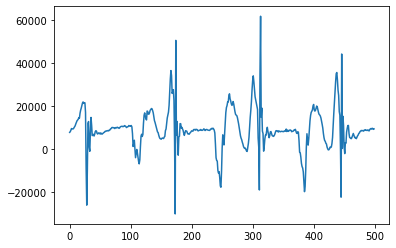

In [16]:
plt.plot(((np.array(df.loc[0,'Xac000':'Xac499'])
                      + np.array(df.loc[0, 'Yac000':'Yac499'])
                      + np.array(df.loc[0, 'Zac000':'Zac499'])
                      + np.array(df.loc[0, 'RotX000':'RotX499'])
                      + np.array(df.loc[0, 'RotY000':'RotY499'])
                      + np.array(df.loc[0, 'RotZ000':'RotZ499']))))

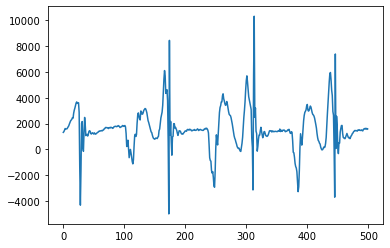

In [17]:
plt.plot(((np.array(df.loc[0,'Xac000':'Xac499'])
                      + np.array(df.loc[0, 'Yac000':'Yac499'])
                      + np.array(df.loc[0, 'Zac000':'Zac499'])
                      + np.array(df.loc[0, 'RotX000':'RotX499'])
                      + np.array(df.loc[0, 'RotY000':'RotY499'])
                      + np.array(df.loc[0, 'RotZ000':'RotZ499'])))/6)

In [16]:
def getRandID():
    """
    Retorna um profile_ID aleatório
    """
    
    profile_ID = list(df_horizontal['profile_ID']) # Coloca todos os profile_ID do dataframe em uma lista.

    # Retorna aleatoriamente UM elemento da lista profile_ID, converte para um inteiro e armazena na variável Rand_ID.
    Rand_ID = int(random.choice(profile_ID)) 
    
    return Rand_ID

# Retorna o status da marcha respectivo ao profile_ID aleatório gerado.
def getRandGaitStatus(Rand_ID):
    """
    Retorna o status da marcha respectivo ao profile_ID aleatório gerado.
    """

    # Rand_ID representa a LINHA, 1 representa a COLUNA de Gait_Status.
    Rand_GaitStatus = df_horizontal.iloc[Rand_ID-1, 1] # O -1 é para pegar a correta indexação do elemento na lista.
    
    return Rand_GaitStatus
    
    


In [27]:
def findWAV_filename(path_to_dir, suffix = ".wav"):
    """
    Retorna todos os arquivos com extensão .wav em uma lista. 
    Os elementos são ordenados em ordem crescente.
    """
    
    # Lista os arquivos no diretório path_to_dir 
    filenames = listdir(path_to_dir) 
    
    # Retorna uma lista com os arquivos com final .csv em ordem crescente baseado no nome do arquivo.
    return sorted([filename for filename in filenames if filename.endswith( suffix )])

In [28]:
def MoveWavFiles(filenames):
    """
    Separa todos os arquivos .wav em listas diferentes conforme a categoria da marcha.
    """
    
    MS_filenames = [] # Lista da categoria "Marcha Soldado"
    MN_filenames = [] # Lsta da categoria "Marcha Normal"
    MM_filenames = [] # Lista da categoria "Marcha Mancando"
    MP_filenames = [] # Lista da categoria "Marcha a Definir"

    
    # Lista os arquivos no diretório path_to_dir
    for filename in filenames:
        
        if (filename.find("MS", 4, 6) != -1): # Se encontrar "MS" no nome do arquivo:
            MS_filenames.append(filename) # Gera lista com todos os "MS" .csv
            
            
        elif (filename.find("MN", 4, 6) != -1): # Se encontrar "MN" no nome do arquivo:
            MN_filenames.append(filename) # Gera lista com todos os "MN" .csv
            
            
        elif (filename.find("MM", 4, 6) != -1): # Se encontrar "MM" no nome do arquivo:
            MM_filenames.append(filename) # Gera lista com todos os "MM" .csv
            
             
        else: # Se encontrar "MP" no nome do arquivo:
            MP_filenames.append(filename) # Gera lista com todos os "MP" .csv
            
            
    

    for filename in MS_filenames: 
        
        # Move os arquivos MS para a pasta de destino MS.
        os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/six_InOne/{}".format(filename),
                  "/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/MS/{}".format(filename))
        
        
    for filename in MM_filenames:
        
        # Move os arquivos MM para a pasta de destino MM.
        os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/six_InOne/{}".format(filename),
                  "/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/MM/{}".format(filename))
    
    for filename in MN_filenames:
        
        # Move os arquivos MN para a pasta de destino MN.
        os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/six_InOne/{}".format(filename),
                  "/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/MN/{}".format(filename))
        
    for filename in MP_filenames:
        
        # Move os arquivos MP para a pasta de destino MP.
        os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/six_InOne/{}".format(filename),
                  "/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/MP/{}".format(filename))

In [29]:
def raw_toWav(df):
    """
    Para cada instância do dataframe, gera 6 arquivos .wav referentes a cada eixo (X,Y,Z) do giroscópio
    e acelerômetro. Preserva o mesmo nome do arquivo .csv, acrescentando a especificação do eixo (X, Y ou Z).
    Pendências:
    - Descobrir qual eixo (X, Y ou Z) é referente ao sentido da caminhada (indo ou voltando)
    - Após essa informação, normalizar esse eixo, pois o sentido, ir ou vir, é irrelevante para detecção de anomalias.
    - Será que é mesmo irrelevante ? 
    """
    
                        #################### Procedimento para Eixo X #################
    # Gera um arquivo .wav para escrita com o nome especificado
    for currentIndex in range(len(df)):
        
        #eixos = "Xac Yac Zac RotX RotY RotZ".split()
        eixos = "Gait".split()
        for eixo in eixos:
            obj = wave.open('/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/six_InOne/{:0>3}{}_{}.wav'.format(
            df['profile_ID'][currentIndex], df['Gait Status'][currentIndex], (eixo)), 'wb')


            obj.setnchannels(1) # Set the number of channels. 1 for Mono, 2 for stereo channels.
            obj.setsampwidth(2) # Set the sample width to n bytes.
            obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
            obj.setnframes(30) #Set the number of  frames to n

            #bufferList = ((np.array(df.loc[currentIndex, 'Xac000':'Xac499'])
            #               + np.array(df.loc[currentIndex, 'Yac000':'Yac499'])
            #               + np.array(df.loc[currentIndex, 'Zac000':'Zac499'])
            #               + np.array(df.loc[currentIndex, 'RotX000':'RotX499'])
            #               + np.array(df.loc[currentIndex, 'RotY000':'RotY499'])
            #               + np.array(df.loc[currentIndex, 'RotZ000':'RotZ499'])))
            
#             bufferList = np.append(np.array(df.loc[currentIndex, 'Zac000':'Zac499']),
#                                    np.array(df.loc[currentIndex, ('{}000'.format(eixo)):('{}499'.format(eixo))]))
            bufferList =  np.array(df.loc[currentIndex, 'Xac000':'RotZ499'])

            for value in bufferList:
                data = struct.pack('<h', value)


                obj.writeframesraw(data) # Write audio frames, without correcting.

            obj.close() # Close the file if it was opened by wave.
        

In [179]:
wav_filenames = findWAV_filename('/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/six_InOne')


In [180]:
MoveWavFiles(wav_filenames)

In [178]:
raw_toWav(df)

In [20]:
# Função para gerar 3 arquivos .wav (eixo x, y e z dos dados do acelerômetro) de uma pessoa
# aleatória específica com marcha NORMAL.
    
# Esta função deverá retornar uma lista com 6 elementos no seguinte formato:
# wav_gait = [0001Xacc_N.wav,0001Yacc_N.wav, 0001Zacc_N.wav]
def get_NWavFiles():
    # Fs = 100 Hz
    # Duração 5 segundos
    
    Rand_ID = getRandID () # Captura um profile_ID aleatório.
    Rand_GaitStatus = getRandGaitStatus(Rand_ID) # Captura o estado da marcha relativo ao profile_ID aleatório.


    while (Rand_GaitStatus != 'N'):
        Rand_ID = getRandID ()
        Rand_GaitStatus = getRandGaitStatus(Rand_ID)
    

    if (Rand_GaitStatus == 'N'):

                            #################### Procedimento para Eixo X #################

        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Xacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisX= list(df.loc[Rand_ID-1, 'Xac000':'Xac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisX:
           
            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.
        
                        #################### Procedimento para Eixo Y #################
            
        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Yacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(500) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(1) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisY= list(df_horizontal.loc[Rand_ID-1, 'Yac000':'Yac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisY:

            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.

                        #################### Procedimento para Eixo Z #################

        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Zacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisZ= list(df_horizontal.loc[Rand_ID-1, 'Zac000':'Zac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisZ:

            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.
        
        
        

        return ['Xacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus),
                'Yacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus),
                'Zacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus)]






    #Próximas implementações:
    # -> 1.Ajustar para que o normal e irregular se refiram ao mesmo indivíduo.
    # -> 2. As comparações de plots devem ser sempre com os mesmos eixos respectivos: x-x , y-y, z-z da aceleração.
    # -> 3. Função que me permita apagar todos os arquivos .wav gerados.


In [21]:
# Função para gerar 3 arquivos .wav (eixo x, y e z dos dados do acelerômetro) de uma pessoa
# aleatória específica com marcha IRREGULAR.
    
# Esta função deverá retornar uma lista com 6 elementos no seguinte formato:
# wav_gait = [0005Xacc_I.wav, 0005Yacc_I.wav, 0005Zacc_I.wav]
def get_IWavFiles():
    # Fs = 100 Hz
    # Duração 5 segundos
    
    Rand_ID = getRandID () # Captura um profile_ID aleatório.
    Rand_GaitStatus = getRandGaitStatus(Rand_ID) # Captura o estado da marcha relativo ao profile_ID aleatório.


    while (Rand_GaitStatus != 'I'):
        Rand_ID = getRandID ()
        Rand_GaitStatus = getRandGaitStatus(Rand_ID)
    

    if (Rand_GaitStatus == 'I'):

                            #################### Procedimento para Eixo X #################

        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Xacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisX= list(df_horizontal.loc[Rand_ID-1, 'Xac000':'Xac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisX:
           
            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.
        
                        #################### Procedimento para Eixo Y #################
            
        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Yacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(25) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisY= list(df_horizontal.loc[Rand_ID-1, 'Yac000':'Yac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisY:

            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.

                        #################### Procedimento para Eixo Z #################

        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Zacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisZ= list(df_horizontal.loc[Rand_ID-1, 'Zac000':'Zac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisZ:

            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.
        
        
        

        return ['Xacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus),
                'Yacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus),
                'Zacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus)]






    #Próximas implementações:
    # -> 1.Ajustar para que o normal e irregular se refiram ao mesmo indivíduo.
    # -> 2. As comparações de plots devem ser sempre com os mesmos eixos respectivos: x-x , y-y, z-z da aceleração.
    # -> 3. Função que me permita apagar todos os arquivos .wav gerados.

In [22]:
#get_IWavFiles()

# Geração de Imagens a partir de Aúdio

Considerações:

1. Análise dinâmica da densidade espectral de energia. Essa densidade pode ser visualizada pela distribuição de cores em um gráfico da Frequência vs Tempo que representam, na verdade, uma distribuição de potência/amplitude do sinal ao longo do Eixo X e Y.

In [30]:
def display_an_spectogram(path, fs, n_fft):
    
    y, sr = librosa.load(path, sr = fs, mono = True)
    print("Fs = {}".format(sr))
    
    D = librosa.stft(y, n_fft = n_fft, window = 'hann', hop_length= 2)
    plt.figure(figsize=(10,10))
    
    plt.subplot(3,1,1)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref = np.max), sr=sr, 
                             y_axis = 'log', x_axis = 'time')
    plt.subplot(3,1,2)
    librosa.display.specshow(librosa.power_to_db(np.abs(D)**2, ref= np.max), y_axis = 'linear', sr=sr,
                             x_axis = 'time')
    
    plt.subplot(3,1,3)
    S = librosa.feature.melspectrogram(S=np.abs(D), n_mels = 64, sr = sr)
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis = 'linear', sr=sr)


Fs = 200


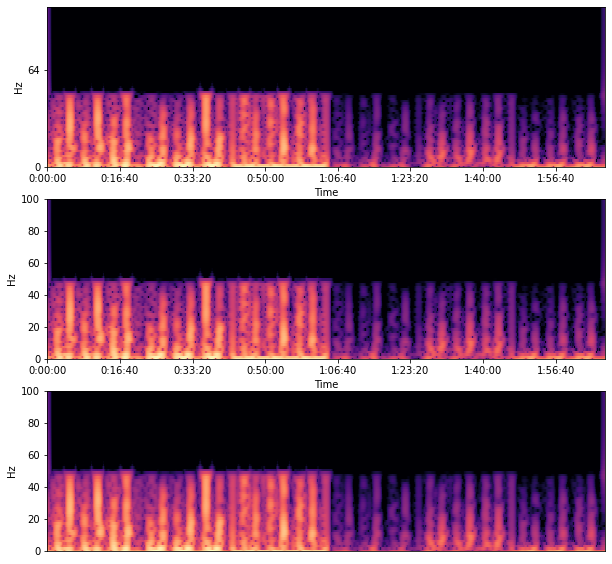

In [32]:
e_file1 = '/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/MS/0013MS_Gait.wav'

display_an_spectogram(path = e_file1, fs = 200, n_fft = 128)

In [18]:
n_fft = 2048
ft = np.abs(librosa.stft(y,window='hann', n_fft=n_fft))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

NameError: name 'y' is not defined

In [33]:
def generate_spectogram_dataset(fs, n_fft):
    
    gait_types = 'MM MS MN MP'.split()
    for gait in gait_types:
        pathlib.Path(f'/home/trs/Gait_Project/GaitDataset/Triagem/pngFiles/{gait}').mkdir(parents=True,
                                                                                         exist_ok= True)
        for filename in os.listdir(f'/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/{gait}'):
            gait_name = f'/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/{gait}/{filename}'
            y, sr = librosa.load(gait_name, mono = True, sr = fs)
            D = librosa.stft(y, n_fft = n_fft, window = 'hann', hop_length=2)
            plt.figure(figsize=(10,5))
            librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref = np.max), sr = fs, y_axis = 'log')
            plt.axis('off')
            plt.savefig(f'/home/trs/Gait_Project/GaitDataset/Triagem/pngFiles/{gait}/{filename[:-3].replace(".", "")}.png')
            plt.clf()

In [34]:

#Gera imagens para os sons
#cmap = plt.get_cmap('inferno')
generate_spectogram_dataset(fs = 200, n_fft = 128)

<ipython-input-33-59e1a96e618f>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

# ImageDataGenerator Parameters

We could use the method ImageDataGenerator like that:

data_generator = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
        
where:
* rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures

* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally

* rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.

* shear_range is for randomly applying shearing transformations

* zoom_range is for randomly zooming inside pictures

* horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).

* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Those parameters above allow the training model to generalize more in order to get a better model.



### Validation Strategies

A good validation strategy in such cases would be to do k-fold cross-validation, but this would require training k models for every evaluation round.

# Método para Extração das Features do Aúdio

In [64]:
gait_types = 'MM MS MN  MP'.split()

In [66]:
# Extrai caracteristicas e gera csv
header = 'filename chroma_stft std_chroma spectral_centroid std_centroid spectral_bandwidth std_bandwidth rolloff std_rolloff zero_crossing_rate std_zcr'
for i in range(1, 21):
    header += f' mfcc{i} std_mfcc{i}'
header += ' label'
header = header.split()

file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for gait in gait_types:
    for filename in os.listdir(f'/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/{gait}'):
        gaitname = f'/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/{gait}/{filename}'
        y, sr = librosa.load(gaitname, mono=True, sr=125)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename[:-4].replace(" ", "").replace("-","")} {np.mean(chroma_stft)} {np.std(chroma_stft)} {np.mean(spec_cent)} {np.std(spec_cent)} {np.mean(spec_bw)} {np.std(spec_bw)} {np.mean(rolloff)} {np.std(rolloff)} {np.mean(zcr)} {np.std(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)} {np.std(e)}'
        to_append += f' {gait}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [67]:
#visualiza
data = pd.read_csv('data.csv')
data.head()
data.shape

(840, 52)

In [68]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [69]:
#Ajusta categorias
sound_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(sound_list)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X

array([[0.52782038, 0.48102443, 0.37031277, ..., 0.18176839, 0.40932423,
        0.15662892],
       [0.6945689 , 0.28868269, 0.27934571, ..., 0.36085982, 0.14578808,
        0.23871187],
       [0.41247437, 0.56575422, 0.29493043, ..., 0.29237279, 0.34946987,
        0.24077858],
       ...,
       [0.5481615 , 0.53119789, 0.53508836, ..., 0.27838359, 0.743704  ,
        0.18051816],
       [0.55667752, 0.49707323, 0.49119182, ..., 0.35355356, 0.57458571,
        0.22627449],
       [0.43035473, 0.7168142 , 0.65455462, ..., 0.16591609, 0.83172364,
        0.25131062]])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y_train)
y_train_c = keras.utils.to_categorical(y_train, num_classes=4)
print(y_train_c)
y_test_c = keras.utils.to_categorical(y_test, num_classes=4)

[3 2 2 0 0 1 0 3 1 0 1 1 2 0 0 0 3 1 3 2 3 3 3 3 2 2 1 2 1 2 0 1 3 1 1 1 1
 2 0 3 0 2 2 0 1 1 2 2 3 3 1 1 3 2 1 1 0 0 2 2 3 0 1 1 2 1 2 0 1 3 3 3 3 0
 0 1 2 1 0 1 1 1 2 0 0 3 1 0 2 2 2 0 1 1 1 2 3 1 0 3 0 0 0 1 2 0 0 0 3 1 3
 0 1 3 3 1 0 3 1 1 3 1 0 1 0 3 3 1 0 0 0 3 1 3 3 0 1 0 0 2 2 0 1 1 3 0 3 1
 3 3 2 2 3 0 1 0 0 0 0 3 1 2 2 3 3 1 2 1 0 0 3 1 1 0 1 2 3 2 2 0 3 3 3 0 1
 3 1 2 2 0 0 2 3 1 1 0 0 0 1 0 0 1 3 2 2 1 0 1 0 1 2 1 3 2 2 1 2 2 2 2 3 1
 0 2 2 3 3 0 1 1 3 0 3 0 0 2 0 2 1 0 0 2 1 2 2 3 1 2 2 3 2 3 1 3 3 3 1 3 1
 1 0 3 1 1 1 0 1 1 1 3 2 3 2 3 3 3 0 1 3 2 2 3 1 3 0 0 3 3 1 2 3 1 3 0 0 3
 3 0 1 0 1 0 2 1 3 2 3 1 0 2 2 2 0 1 0 0 2 2 1 3 1 0 2 2 2 1 3 0 0 0 2 2 1
 3 3 0 0 1 1 2 1 0 1 3 3 0 0 2 3 3 2 0 3 2 2 2 0 3 3 0 1 1 0 1 2 2 1 3 2 3
 1 1 0 2 2 2 0 0 0 1 1 2 0 3 1 1 2 0 0 0 2 2 2 3 1 2 3 1 3 0 0 2 2 0 1 0 3
 2 0 3 2 2 3 2 0 2 3 0 2 0 0 2 0 2 2 3 1 2 2 0 3 1 2 1 1 1 2 3 2 0 0 0 2 2
 2 2 1 3 2 3 1 3 2 1 1 3 2 1 1 0 3 0 3 0 3 3 2 1 0 2 3 2 1 3 1 2 3 1 3 3 0
 3 2 1 0 1 0 3 3 3 0 3 2 

In [106]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(layers.Dense(4, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam',
              loss='categorical_crossentropy', #opcao sparse_categorical_crossentropy
              metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1024)              52224     
_________________________________________________________________
dropout_33 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 4)                 1028      
Total params: 315,652
Trainable params: 315,652
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
history = model.fit(X_train,
                    y_train_c,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test_c))

Epoch 1/100
11/11 [==============================] - 1s 18ms/step - loss: 1.3006 - accuracy: 0.3311 - val_loss: 1.0926 - val_accuracy: 0.5536
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 1.0458 - accuracy: 0.5901 - val_loss: 0.9282 - val_accuracy: 0.6071
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8902 - accuracy: 0.6693 - val_loss: 0.8059 - val_accuracy: 0.6905
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7843 - accuracy: 0.7212 - val_loss: 0.6640 - val_accuracy: 0.8036
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.7720 - val_loss: 0.6237 - val_accuracy: 0.7619
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6450 - accuracy: 0.7813 - val_loss: 0.5710 - val_accuracy: 0.7857
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.7816 - val_loss: 0.5403 - val_accuracy: 0.7738
Epoch 8/100


Epoch 59/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1008 - accuracy: 0.9648 - val_loss: 0.4297 - val_accuracy: 0.8452
Epoch 60/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9758 - val_loss: 0.3424 - val_accuracy: 0.8690
Epoch 61/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0774 - accuracy: 0.9785 - val_loss: 0.3001 - val_accuracy: 0.8750
Epoch 62/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0750 - accuracy: 0.9770 - val_loss: 0.3029 - val_accuracy: 0.8810
Epoch 63/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0698 - accuracy: 0.9817 - val_loss: 0.3576 - val_accuracy: 0.8690
Epoch 64/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0750 - accuracy: 0.9825 - val_loss: 0.3689 - val_accuracy: 0.8810
Epoch 65/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0663 - accuracy: 0.9773 - val_loss: 0.3686 - val_accuracy: 0.8631
Epoch 

In [108]:
y_test_c = keras.utils.to_categorical(y_test, num_classes=4)
test_loss, test_acc = model.evaluate(X_test,y_test_c)
print('test_acc: ',test_acc)

6/6 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8869
test_acc:  0.886904776096344


In [109]:
# Vendo alguns reports
# Usando sklearn
from sklearn.metrics import classification_report, confusion_matrix

# Classificando toda base de teste
y_pred = model.predict_classes(X_test)
print(y_pred)
print(y_test)
# voltando pro formato de classes
#import numpy as np
#y_pred = np.argmax(y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
target_names = ['MM', 'MS', 'MN',  'MP']
print(classification_report(y_test, y_pred, target_names=target_names))

[1 0 0 0 0 0 1 3 2 2 1 2 1 3 3 0 1 1 3 0 0 2 2 3 3 2 3 3 3 0 2 3 0 2 1 1 1
 2 3 0 1 0 2 3 3 3 3 2 3 0 2 3 3 1 3 2 3 2 1 0 0 1 3 0 0 1 3 0 0 2 2 1 2 0
 0 3 2 1 2 1 2 3 2 0 0 0 2 3 3 2 2 3 2 3 0 1 3 1 3 1 2 0 1 1 1 2 2 2 1 2 3
 2 2 1 1 1 0 1 2 2 0 1 1 0 1 1 0 3 0 2 1 3 1 0 1 3 2 1 0 3 0 2 2 3 2 1 1 0
 2 2 2 2 3 1 0 3 0 0 3 1 0 1 1 3 0 3 0 1]
[1 0 0 0 0 0 1 3 2 1 1 2 1 3 3 1 3 1 3 0 0 2 2 3 3 3 3 3 3 0 2 3 0 2 1 3 1
 2 3 0 1 0 3 3 3 3 3 1 3 0 2 3 3 1 3 2 3 2 1 0 0 1 3 0 0 1 1 0 0 2 2 1 2 0
 0 3 2 1 2 1 2 3 0 0 0 0 3 3 3 2 2 3 2 3 1 1 2 1 3 1 2 0 1 1 0 2 2 2 1 2 3
 2 2 1 1 1 0 1 2 0 0 2 1 0 2 1 0 3 0 3 1 3 1 0 1 3 2 1 0 3 0 2 2 3 2 1 1 0
 2 2 2 2 3 1 0 3 0 0 3 1 0 1 3 3 0 2 0 1]
Confusion Matrix
[[39  1  2  0]
 [ 2 37  2  1]
 [ 0  2 35  2]
 [ 0  3  4 38]]
Classification Report
              precision    recall  f1-score   support

          MM       0.95      0.93      0.94        42
          MS       0.86      0.88      0.87        42
          MN       0.81      0.90      0.85        39

/home/trs/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Ler algumas amostras de Aúdio

In [17]:
sr = 16000
e_file1 = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/gait_X.wav'

# 5 segundos de amostragem
y1, sr = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=5)

/home/trs/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/gait_X.wav'

## Escutar a amostra de Aúdio

In [ ]:
from IPython.display import Audio, IFrame, display

display(Audio(y1,rate=sr))

##### O aúdio acima representa a geração de um arquivo .wav a partir de dados raw do acelerômetro no eixo X. Foram tomadas 500 amostras em um intervalo de aproximadamente = 5 segundos para formar esse arquivo em formato de aúdio .wav

# Etapa X.x.x: Comparação entre as curvas de resposta


In [ ]:
P1WavAccN = get_NWavFiles()
P2WavAccN = get_NWavFiles()
    

P1WavAccI = get_IWavFiles()
P2WavAccI = get_IWavFiles()

sr = 16000

### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo x.


In [ ]:
P1WavAccN_X = P1WavAccN[0]
P2WavAccN_X = P2WavAccN[0]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccN_X)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccN_X)

In [ ]:
# 5 segundos de amostragem
P1WavAccN_X, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccN_X, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)


In [ ]:
librosa.display.waveplot(P1WavAccN_X,sr=sr,x_axis='time')


In [ ]:
librosa.display.waveplot(P2WavAccN_X,sr=sr,x_axis='time')


### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo y.


In [ ]:
P1WavAccN_Y = P1WavAccN[1]
P2WavAccN_Y = P2WavAccN[1]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccN_Y)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccN_Y)

In [ ]:
# 5 segundos de amostragem
P1WavAccN_Y, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccN_Y, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)

In [ ]:
librosa.display.waveplot(P1WavAccN_Y,sr=sr,x_axis='time')

In [ ]:
librosa.display.waveplot(P2WavAccN_Y,sr=sr,x_axis='time')


### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo z.


In [ ]:
P1WavAccN_Z = P1WavAccN[2]
P2WavAccN_Z = P2WavAccN[2]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccN_Z)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccN_Z)
print(P1WavAccN_Z, P1wav_path)

In [ ]:
# 5 segundos de amostragem
P1WavAccN_Z, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccN_Z, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)

In [ ]:
librosa.display.waveplot(P1WavAccN_Z,sr=sr,x_axis='time')

In [ ]:
librosa.display.waveplot(P2WavAccN_Z,sr=sr,x_axis='time')


### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo x.


In [ ]:
P1WavAccI_X = P1WavAccI[0]
P2WavAccI_X = P2WavAccI[0]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccI_X)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccI_X)
print(P1WavAccI_X, P1wav_path,P2wav_path)

In [ ]:
# 5 segundos de amostragem
P1WavAccI_X, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccI_X, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)

In [ ]:
librosa.display.waveplot(P1WavAccI_X,sr=sr,x_axis='time')

In [ ]:
librosa.display.waveplot(P2WavAccI_X,sr=sr,x_axis='time')


### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo x.


In [ ]:
P1WavAccN_X = P1WavAccN[0]
P2WavAccI_X = P2WavAccI[0]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccN_X)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccI_X)
print(P1wav_path,P2wav_path)

In [ ]:
# 5 segundos de amostragem
P1WavAccN_X, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccI_X, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)

In [ ]:
librosa.display.waveplot(P1WavAccN_X,sr=sr,x_axis='time')

In [ ]:
librosa.display.waveplot(P2WavAccI_X,sr=sr,x_axis='time')


##### O plot acima ilustra  bem o que é possível observar pela audição: em intervalos de tempos parecidos, um pico ( uma vibração forte) é possível de se escutar.

# [Pré Processamento] Escala dos Dados


In [9]:
# StandardScaler: Essa técnica na prática ignora a forma de distribuição e transforma o dado para forma com média
# próxima de zero e um desvio padrão próximo a um, ou seja, assume que não temos valores discrepantes nos dados
# e normaliza tudo.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [10]:
# Objeto para fazer a re-escala dos dados. Aqui ainda é um "recipiente" para os dados.
scaler = MinMaxScaler(feature_range=(-1,1));

In [11]:
# Os dados das features do dataframe df são reestruturados a partir do chamada do método fit no objeto scaler.
# Aqui ainda não ocorre a transformação, mas sim uma "preparação" para a transformação.
scaler.fit(df_for_modeling)

MinMaxScaler(feature_range=(-1, 1))

In [12]:
# Aqui os dados das colunas passadas no scaler.fit(df) sofrem uma tansformação. Os dados  possuem escalas ajustadas
# de modo  a prepará-los para executar um modelo de ML. 
scaled_data = scaler.transform(df_for_modeling)

# dataframe_teste = pd.DataFrame(scaled_data)
# dataframe_teste.head()

# [Pré Processamento] Redução com PCA
#### Redução de Dimensionalidade aplicando PCA

In [13]:
# Cria um objeto que servirá de "recipiente" para os dados "scaled_data".
# Observa-se que o número de componentes principais setado foi  = 60 (10 para cada eixo. Total 6*10).

# Preciso coletar mais dados, pois o n_components máximo é igual ao mínimo entre min(n_samples, n_features)=30.
pca = PCA(n_components=60)

# n_components entre 30 - 40 melhora significamente o algoritmo SVM com escala MinMaxScaler;
# Os outros modelos não atendem bem nessas configurações. Acurácia: 69%

# O melhor modelo encontrado até agora foi com DecisionTree não passando pelo processo de escala dos dados e 
# com n_components = 3. Acurácia: 72% - 74%

# Att 18/11/2020 : Melhor modelo encontrado até agora foi com SVM passando pelo StandarScaler e n_components >= 15. 
# Acurácia: 74% - 78%

In [14]:
# Dimensiona o objeto "recipiente" pca para os dados da variável scaled_data
#pca.fit(df_pca)
pca.fit(scaled_data)

######## AJUSTAR PARA df_pca OU scaled_data ... TESTAR ############

PCA(n_components=60)

In [15]:
# Apply the rotation in dimensionality reduction by calling transform
#x_pca = pca.transform(df_pca) 
df_with_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape # Dados padronizados antes da transformação PCA

(840, 3000)

In [17]:
df_with_pca.shape # Dados padronizados apenas com 30 features após a transformação PCA

(840, 60)

In [18]:
# Dataframe que representa o dataset original através da redução de dimensionalidades de 3000 features para 30.
df_PCA = pd.DataFrame(df_with_pca) 
df_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,2.258464,3.349865,2.202025,-0.340321,-3.657410,-0.772106,2.271321,-0.073401,1.286762,2.072004,-2.130055,3.254547,0.764430,-4.185433,2.092303,-4.028032,0.327760,1.560645,-1.067291,-0.537501,1.076287,-0.405215,0.605793,-0.147402,0.767484,0.730091,0.395628,1.293609,-0.412192,0.253586,-0.514645,-0.388345,1.185705,-0.615834,-0.517787,1.055278,1.139979,-0.023472,-1.918961,-0.577070,-0.246053,0.784149,0.048286,-0.222915,1.224318,-0.033530,0.494250,-0.813520,-0.706364,0.337817,-0.037237,1.171311,-0.822799,-0.917779,0.824873,0.146055,-1.355250,0.427967,-0.444466,-0.513846
1,-0.866711,-4.809440,-3.849005,0.492939,-3.451881,-3.135066,1.136312,-3.757779,-4.957952,-2.112596,1.371692,-4.987325,-1.303744,4.124448,-0.294061,-1.747294,1.170599,3.895496,0.219518,-0.497864,1.597084,-0.897991,0.477612,0.294043,-1.280943,1.412847,-1.260477,-0.672060,-2.276738,-0.416674,-0.053387,-0.912437,-2.111576,0.358954,-1.825267,2.086737,0.020114,-0.757405,-0.458531,-1.569033,0.493392,1.176567,2.660660,0.900102,0.697344,0.704535,-2.274108,-1.268204,-0.323285,0.640645,0.319258,0.893862,-1.464160,-1.129456,-0.272241,-0.190082,0.075850,-0.919240,0.418077,0.560232
2,-1.065455,2.508241,-0.248584,0.969559,-2.496308,1.910931,-3.721444,0.408216,-5.219635,0.688745,-0.082247,0.260478,1.702812,0.202502,1.672625,-0.722790,1.238179,-0.036434,2.129106,0.341607,-1.281573,-1.343675,-0.904393,-1.238876,0.022826,-2.021062,0.749113,0.591632,0.416049,0.936975,-0.705210,0.136306,-0.311878,0.189676,0.992209,-1.850228,-0.653835,0.198296,0.376152,0.667452,-0.665056,1.048433,-0.407189,-0.126452,-1.277315,-0.195381,0.420547,-0.045279,-0.737513,-0.208680,1.140009,-0.415455,-0.494789,-0.223466,-0.112845,0.795919,-0.023143,0.264331,0.255692,0.559687
3,1.980626,-1.087278,5.672330,-0.248743,-3.823596,-1.513660,2.325711,-0.945075,1.353741,1.916318,2.224990,0.921943,-2.411188,-2.833508,0.946959,-0.434819,-0.326351,-0.676214,1.585868,0.516801,-0.978393,1.839517,0.891560,-0.259460,0.023796,-0.362056,2.211476,1.035028,-1.846888,1.799489,-0.349286,0.299591,0.146610,0.592852,0.438246,-1.079557,-0.188635,-0.931691,1.675146,0.524306,0.256170,-0.258860,0.208682,-2.269050,0.057928,-0.925103,-3.313091,2.121743,1.678735,0.844238,0.499807,0.118764,-1.601141,0.041520,0.934945,-0.865018,0.057525,-2.059198,-0.344873,2.347214
4,-2.970673,-3.422727,0.118480,2.508825,-1.782751,0.775341,-1.589256,1.798574,-1.947358,-1.105241,0.239547,-5.185110,-1.284195,-1.481018,-4.201292,3.814829,-0.146640,1.877956,3.462338,-0.827354,-1.788349,0.016220,0.745583,-0.469189,1.378202,0.680707,-0.044390,0.380002,0.795613,-0.216838,-1.801255,-1.366349,1.706619,-1.992964,0.763201,-0.191380,0.159762,1.225536,-0.242263,1.090126,-1.744633,-0.257825,0.441361,0.833722,-1.067140,-0.293844,1.572068,0.377917,-0.675403,0.335543,1.283953,-0.964490,-1.422933,-0.001449,0.675784,-0.067161,0.898573,0.267649,-1.026490,-2.014601


# Formatação de Multi Classes para Marcha Humana

In [19]:

y = df["Gait Status"]

y = LabelEncoder().fit_transform(y)
X = df_with_pca # Features após a redução de dimensionalidades com PCA


# Split do dataset em treino e teste


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Modelo de Regressão Logística

In [26]:
#lm = OneVsRestClassifier(LogisticRegression())
lm = LogisticRegression()

In [27]:
lm.fit(X_train,y_train)

LogisticRegression()

In [28]:
predictions = lm.predict( X_test)

In [29]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[10  9  8  9]
 [10 21  4  5]
 [ 6  1 36  3]
 [ 7  9  2 28]]


              precision    recall  f1-score   support

           0       0.30      0.28      0.29        36
           1       0.53      0.53      0.53        40
           2       0.72      0.78      0.75        46
           3       0.62      0.61      0.62        46

    accuracy                           0.57       168
   macro avg       0.54      0.55      0.55       168
weighted avg       0.56      0.57      0.56       168



In [30]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=LeaveOneOut(), scoring= "accuracy")
scores

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0.

In [31]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.53 (+/- 1.00)


In [102]:
import joblib

In [41]:
# save the model to disk
filename = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/Models/LogisticRegression/finalized_model.sav'
joblib.dump(lm, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

NameError: name 'joblib' is not defined

In [265]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[30 13  0]
 [ 9 31  6]
 [ 1  4 29]]


              precision    recall  f1-score   support

           0       0.75      0.70      0.72        43
           1       0.65      0.67      0.66        46
           2       0.83      0.85      0.84        34

    accuracy                           0.73       123
   macro avg       0.74      0.74      0.74       123
weighted avg       0.73      0.73      0.73       123



In [40]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier()
snn_classifier.fit(X_train,y_train)
predictions = snn_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[30 13  0  1]
 [ 6 49  0  8]
 [ 0  1 33  0]
 [ 2  3  1 28]]


              precision    recall  f1-score   support

           0       0.79      0.68      0.73        44
           1       0.74      0.78      0.76        63
           2       0.97      0.97      0.97        34
           3       0.76      0.82      0.79        34

    accuracy                           0.80       175
   macro avg       0.81      0.81      0.81       175
weighted avg       0.80      0.80      0.80       175



/home/trs/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.51 (+/- 1.00)


# SVM MACHINE LEARNING MODEL

In [29]:
#model = OneVsRestClassifier(SVC( ))
model = SVC(decision_function_shape= 'ovo')


In [30]:
model.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [31]:
predictions = model.predict(X_test)

In [32]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[32  4  0  0]
 [ 1 39  0  0]
 [ 2  0 43  1]
 [ 0  3  0 43]]


              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.85      0.97      0.91        40
           2       1.00      0.93      0.97        46
           3       0.98      0.93      0.96        46

    accuracy                           0.93       168
   macro avg       0.93      0.93      0.93       168
weighted avg       0.94      0.93      0.94       168



In [33]:
from sklearn.model_selection import cross_val_score

# Utilizando as métricas do cross_val_score
#scores = cross_val_score(SVC(decision_function_shape = 'ovo', C=10, gamma = 0.1, kernel = 'rbf'), X, y, cv=LeaveOneOut(), scoring= "accuracy")
scores = cross_val_score(SVC(decision_function_shape = 'ovo', C=100, gamma = 0.01, kernel = 'rbf'), X, y, cv=LeaveOneOut(), scoring= "accuracy")



In [34]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.94 (+/- 0.49)


In [46]:
 
from sklearn.model_selection import cross_validate, LeaveOneOut

# Utilizando as métricas do cross_validate
# cross_validate(SVC(decision_function_shape = 'ovo', C=10, gamma = 0.1, kernel = 'rbf'),X,y,cv=LeaveOneOut(), scoring = 'accuracy')['test_score'].mean()
cross_validate(SVC(decision_function_shape = 'ovo', C=100, gamma = 0.01, kernel = 'rbf'),X,y,cv=LeaveOneOut(), scoring = 'accuracy')['test_score'].mean()


0.9357142857142857

## SVM Model Analysis

### I - Learning Curve

In [290]:
from sklearn.model_selection import learning_curve
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import ShuffleSplit


In [292]:
def plot_learning_curve(estimator, title, X, y,train_sizes, ylim = None, cv = None, n_jobs = None, path = 'filename.png'):

    """
    Generete 1 plot: the learning curve ( score versus training size)
    
    Parameters
    ---------------
    estimator : estimator instance
        An estimator instance implementing `fit`and `predict` methods which will be cloned for each validation
    title : str
        Title for the chart
    X : array-like of shape (n_samples, n_features)
        Training vector, whwere ``n_samples`` is the number of samples and ``n_features`` is the number of features
    
    y : array-like of shape (n_samples) or (n_samples, n_features)
        Targer relative to ``X`` for classification or regression;
        None for unsupervised learning.
    
    axes : array-like of shape (3, ), default = None
        Axes to use for plotting the curves.
    
    ylim : tuple of shape (2,), default = None
        Define minimum and maximum y-values plotted, e.g. (ymin, ymax).
    
    cv : int, cross-validation generator or an iterable, default = None
        Determines the cross-validation splitting strategy
        Possible inputs for cv are:
            
            - None, to use the default 5-fold cross validation,
            - integer, to specify the number of folds.
            - :term: `CV splitters`,
            - An iterable yelding (train, test) splits as array of indices.
            
            For integer/None inputs, if ``y`` is binary or multiclass, 
            :class: `StratifiedKFold`used. If the estimator is not a classifier
            or if ``y``is neither binary  nor multiclass, :class: `KFold` is used.
            
            Refer :ref: `User Guide <cross_validation>` for the various cross-validators that can be used here.
            
    n_jobs : int or None, default = None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in :obj: `joblib.parallel_backed` context.
        ``-1`` means using all processors. See :term: `Glossary <n_jobs>` for more details.
    
    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to generate the learning curve.
        If the ``dtype`` is float, it is regarded as a fraction of maximum size of training set (that is determined
        by the selected validation method), i.e, it has to be within (0, 1]. Otherwise it is interpreted as absolute sizes of
        the training sets. Note that for classification the number of samples usually have to be big enough to contain
        at least one sample from each class. (default: np.linspace(0.1, 1.0, 5))
           
    """

    
    
    fig = plt.figure(figsize=(7,7), dpi = 100)
        
    plt.title(title, color = 'black')
    
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Número de amostras para treino", color = "black" )
    plt.ylabel("Acurácia", color = "black")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,scoring = 'accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Acurácia de Treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Acurácia de Validação Cruzada")
    
    plt.legend(loc="lower right")
    
    plt.grid(True)
    
    
    output_file = os.path.join('/home/trs/Gait_Project/Documentação/Results', path)
    
    plt.savefig(output_file)
            
    plt.show()
    

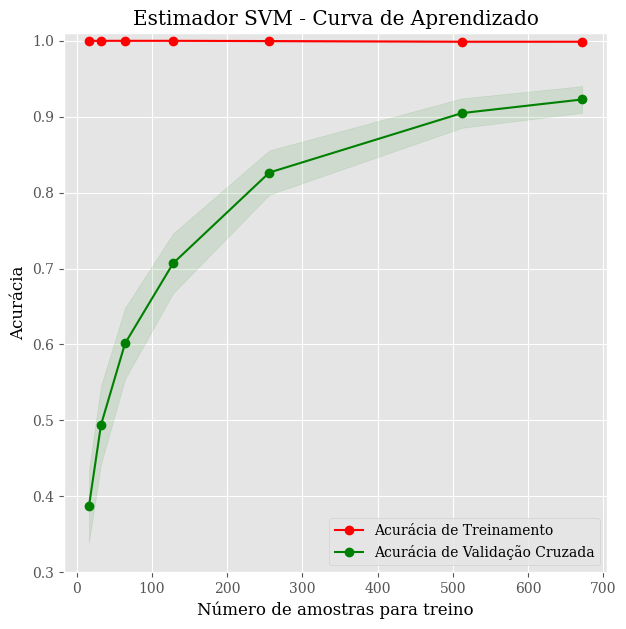

In [298]:
import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'


title = "Estimador SVM - Curva de Aprendizado"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVC(decision_function_shape = 'ovo', C=100, gamma = 0.01, kernel = 'rbf')
plt = plot_learning_curve(estimator, title, X, y, ylim=(0.3, 1.01),
                    cv=cv, n_jobs=4, train_sizes=[16, 32, 64, 128, 256, 512, 672], path = 'SVM_LearningCurve.png')


### II - Confusion Matrix

In [301]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import cm
import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'

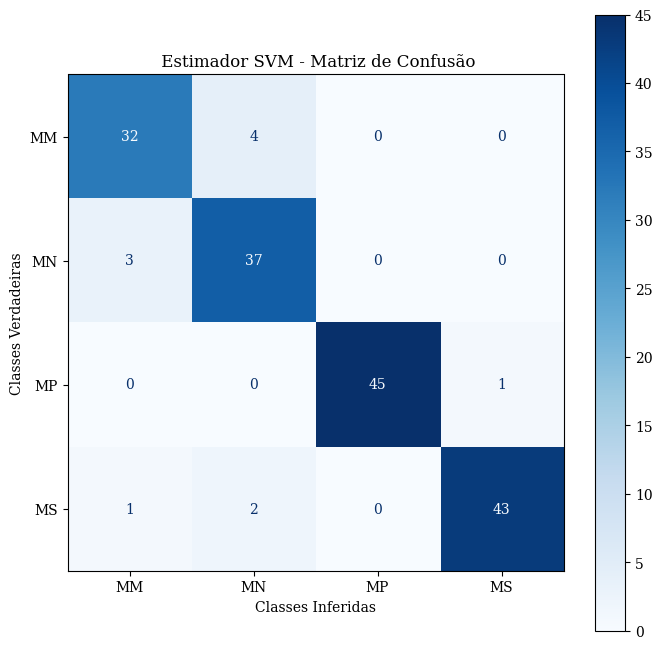

In [318]:
fig, ax = plt.subplots(figsize = (8,8), dpi = 100)


y = df["Gait Status"]
X = df_with_pca # Features após a redução de dimensionalidades com PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = SVC(decision_function_shape = 'ovo', C=100, gamma = 0.01, kernel = 'rbf')
model = model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test, cmap = matplotlib.cm.Blues, ax = ax, labels = ["MM", "MN", "MP", "MS"])

ax.set_title(" Estimador SVM - Matriz de Confusão")
ax.set_xlabel("Classes Inferidas")
ax.set_ylabel("Classes Verdadeiras")
ax.grid(False)
fig.savefig('/home/trs/Gait_Project/Documentação/Results/SVM_ConfusionMatrix.png')


# plt.show()

### IV - ROC Curve

In [319]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc

In [234]:
y = df["Gait Status"]

y = LabelEncoder().fit_transform(y)
X = df_with_pca # Features após a redução de dimensionalidades com PCA




In [235]:
# Binarize the output
y = label_binarize(y, classes = [0, 1, 2, 3])
n_classes = y.shape[1]

In [236]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [244]:
from sklearn.multiclass import OneVsRestClassifier

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(C=100, gamma = 0.01, kernel = 'rbf', probability=True, decision_function_shape='ovo'))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

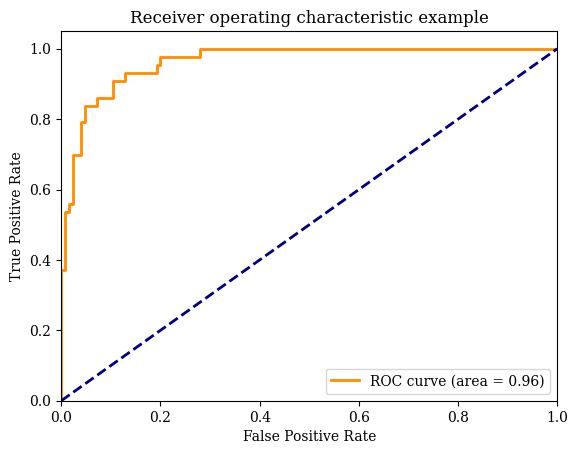

In [245]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<ipython-input-246-ca434529b813>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


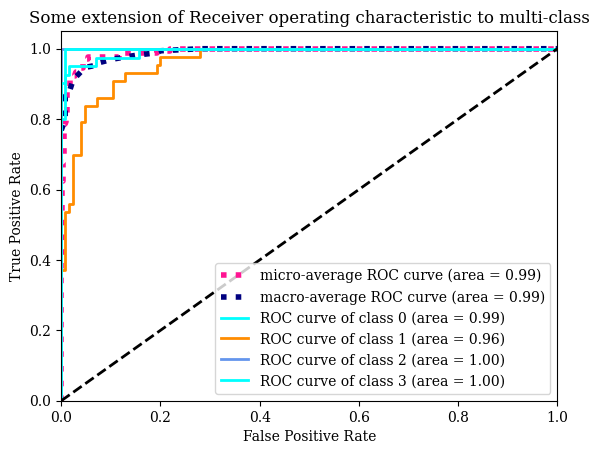

In [246]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Tunel for SVM with GridSearchCV

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
param_grid = {'C':[0.0001,0.001,0.1,1,10,100,1000, 100000], 'gamma':[1,0.1,0.01,0.001,0.0001,0.00001], 
              'kernel':['rbf','poly', 'sigmoid']}

In [139]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [140]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.259, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.259, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.254, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.261, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.261, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=poly ..................................
[CV] ...... C=0.0001, gamma=1, kernel=poly, score=0.793, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=poly ..................................
[CV] ...... C=0.0001, gamma=1, kernel=poly, score=0.844, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=poly ..................................
[CV] ...... C=0.0001, gamma=1, kernel=poly, score=0.761, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=poly ..................................
[CV] ...... C=0.0001, gamma=1, kernel=poly, score=0.776, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=poly ..................................
[CV] ...... C=0.0001, gamma=1, kernel=poly, score=0.828, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=sigmoid ...............................
[CV] ... C=0.0001, gamma=1, kernel=sigmoid, score=0.259, total=   0.1s
[CV] C=0.0001, gamma=1, kernel=sigmoid ...............................
[CV] .

[CV] . C=0.0001, gamma=0.0001, kernel=poly, score=0.259, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=poly .............................
[CV] . C=0.0001, gamma=0.0001, kernel=poly, score=0.259, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=poly .............................
[CV] . C=0.0001, gamma=0.0001, kernel=poly, score=0.254, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=poly .............................
[CV] . C=0.0001, gamma=0.0001, kernel=poly, score=0.261, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=poly .............................
[CV] . C=0.0001, gamma=0.0001, kernel=poly, score=0.261, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=sigmoid ..........................
[CV]  C=0.0001, gamma=0.0001, kernel=sigmoid, score=0.259, total=   0.1s
[CV] C=0.0001, gamma=0.0001, kernel=sigmoid ..........................
[CV]  C=0.0001, gamma=0.0001, kernel=sigmoid, score=0.259, total=   0.1s
[CV] C=0.0001, gamma=0.0001, kernel=sigmoid ..........................
[C

[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.261, total=   0.1s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV] .... C=0.001, gamma=0.01, kernel=poly, score=0.259, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV] .... C=0.001, gamma=0.01, kernel=poly, score=0.259, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV] .... C=0.001, gamma=0.01, kernel=poly, score=0.254, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV] .... C=0.001, gamma=0.01, kernel=poly, score=0.261, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV] .... C=0.001, gamma=0.01, kernel=poly, score=0.261, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV] . C=0.001, gamma=0.01, kernel=sigmoid, score=0.259, total=   0.1s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV] .

[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.261, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.822, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.791, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.813, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.851, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.044, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.254, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.261, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.261, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.259, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.259, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.254, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.261, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .

[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.793, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.769, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.799, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.851, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.259, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.259, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] .

[CV] ........... C=10, gamma=1, kernel=rbf, score=0.363, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.385, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.328, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.381, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.373, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.822, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.867, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .

[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=0.425, total=   0.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=0.493, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.259, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.259, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.254, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.269, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.261, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV] .

[CV] .... C=100, gamma=0.1, kernel=sigmoid, score=0.112, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.896, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.926, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.918, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.903, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.955, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ...... C=100, gamma=0.01, kernel=poly, score=0.793, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] .

[CV] .. C=100, gamma=1e-05, kernel=sigmoid, score=0.261, total=   0.1s
[CV] C=100, gamma=1e-05, kernel=sigmoid ..............................
[CV] .. C=100, gamma=1e-05, kernel=sigmoid, score=0.261, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.363, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.385, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.328, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.381, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.373, total=   0.1s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV] .

[CV] . C=1000, gamma=0.001, kernel=sigmoid, score=0.567, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] . C=1000, gamma=0.001, kernel=sigmoid, score=0.575, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.659, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.570, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.582, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.664, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.657, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=poly ...............................
[CV] .

[CV] . C=100000, gamma=0.1, kernel=sigmoid, score=0.141, total=   0.1s
[CV] C=100000, gamma=0.1, kernel=sigmoid .............................
[CV] . C=100000, gamma=0.1, kernel=sigmoid, score=0.149, total=   0.1s
[CV] C=100000, gamma=0.1, kernel=sigmoid .............................
[CV] . C=100000, gamma=0.1, kernel=sigmoid, score=0.112, total=   0.1s
[CV] C=100000, gamma=0.1, kernel=sigmoid .............................
[CV] . C=100000, gamma=0.1, kernel=sigmoid, score=0.112, total=   0.1s
[CV] C=100000, gamma=0.01, kernel=rbf ................................
[CV] .... C=100000, gamma=0.01, kernel=rbf, score=0.889, total=   0.0s
[CV] C=100000, gamma=0.01, kernel=rbf ................................
[CV] .... C=100000, gamma=0.01, kernel=rbf, score=0.926, total=   0.0s
[CV] C=100000, gamma=0.01, kernel=rbf ................................
[CV] .... C=100000, gamma=0.01, kernel=rbf, score=0.910, total=   0.0s
[CV] C=100000, gamma=0.01, kernel=rbf ................................
[CV] .

[CV]  C=100000, gamma=1e-05, kernel=sigmoid, score=0.593, total=   0.1s
[CV] C=100000, gamma=1e-05, kernel=sigmoid ...........................
[CV]  C=100000, gamma=1e-05, kernel=sigmoid, score=0.489, total=   0.1s
[CV] C=100000, gamma=1e-05, kernel=sigmoid ...........................
[CV]  C=100000, gamma=1e-05, kernel=sigmoid, score=0.478, total=   0.1s
[CV] C=100000, gamma=1e-05, kernel=sigmoid ...........................
[CV]  C=100000, gamma=1e-05, kernel=sigmoid, score=0.567, total=   0.1s
[CV] C=100000, gamma=1e-05, kernel=sigmoid ...........................
[CV]  C=100000, gamma=1e-05, kernel=sigmoid, score=0.582, total=   0.1s


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   58.0s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [141]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [142]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01)


In [143]:
grid_predictions = grid.predict(X_test)

In [144]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[32  4  0  0]
 [ 3 37  0  0]
 [ 0  0 45  1]
 [ 1  2  0 43]]


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.86      0.93      0.89        40
           2       1.00      0.98      0.99        46
           3       0.98      0.93      0.96        46

    accuracy                           0.93       168
   macro avg       0.93      0.93      0.93       168
weighted avg       0.94      0.93      0.94       168



In [145]:
# scores = cross_val_score(grid, X, y, cv=LeaveOneOut(), scoring= "accuracy")
# scores

In [146]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.94 (+/- 0.49)


# Decision Tree Algorithm

In [147]:

model = DecisionTreeClassifier()

In [148]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [149]:
predictions = model.predict(X_test)

In [150]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[25  7  2  2]
 [ 4 24  6  6]
 [ 3  9 30  4]
 [ 3  7  3 33]]


              precision    recall  f1-score   support

           0       0.71      0.69      0.70        36
           1       0.51      0.60      0.55        40
           2       0.73      0.65      0.69        46
           3       0.73      0.72      0.73        46

    accuracy                           0.67       168
   macro avg       0.67      0.67      0.67       168
weighted avg       0.68      0.67      0.67       168



In [151]:

model.score(X_test,y_test)

0.6666666666666666

In [152]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
scores = cross_val_score(model, X, y, cv=15, scoring= "accuracy")
scores

array([0.35714286, 0.5       , 0.58928571, 0.55357143, 0.67857143,
       0.78571429, 0.64285714, 0.51785714, 0.60714286, 0.53571429,
       0.57142857, 0.58928571, 0.67857143, 0.57142857, 0.58928571])

In [153]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.58 (+/- 0.19)


In [154]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [146]:
parameters = dict(criterion=criterion)
parameters

NameError: name 'criterion' is not defined

In [147]:
grid = GridSearchCV(DecisionTreeClassifier(), parameters, refit = True, verbose = 3) 

NameError: name 'parameters' is not defined

In [70]:
grid.fit(X_train,y_train)

NameError: name 'grid' is not defined

In [71]:
grid.best_params_

NameError: name 'grid' is not defined

In [72]:
grid.best_estimator_

NameError: name 'grid' is not defined

In [73]:
grid_predictions = grid.predict(X_test)

NameError: name 'grid' is not defined

In [1385]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 8  5]
 [10  7]]


              precision    recall  f1-score   support

           0       0.44      0.62      0.52        13
           1       0.58      0.41      0.48        17

    accuracy                           0.50        30
   macro avg       0.51      0.51      0.50        30
weighted avg       0.52      0.50      0.50        30



In [1386]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
scores = cross_val_score(grid, X, y, cv=30, scoring= "accuracy")
scores

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.550, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.579, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.579, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.632, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.526, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.550, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.500, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.650, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.526, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.421, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.421, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.650, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

[CV] ................... criterion=entropy, score=0.368, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.421, total=   0.0s
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.450, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.750, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.526, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.368, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.684, total=   0.0s
[CV] criterion=en

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finish

array([0.25      , 0.5       , 0.75      , 0.5       , 0.5       ,
       0.75      , 0.75      , 0.5       , 0.5       , 0.5       ,
       0.33333333, 1.        , 0.33333333, 0.33333333, 0.33333333,
       1.        , 1.        , 0.33333333, 0.33333333, 0.66666667,
       0.33333333, 1.        , 0.33333333, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 1.        , 1.        , 0.33333333])

In [1387]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.59 (+/- 0.50)


# Random Forest Classifier 

In [320]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
predictions = rf_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))



[[31  5  0  0]
 [ 2 34  0  4]
 [ 1  1 44  0]
 [ 0  4  0 42]]


              precision    recall  f1-score   support

          MM       0.91      0.86      0.89        36
          MN       0.77      0.85      0.81        40
          MP       1.00      0.96      0.98        46
          MS       0.91      0.91      0.91        46

    accuracy                           0.90       168
   macro avg       0.90      0.90      0.90       168
weighted avg       0.90      0.90      0.90       168



In [321]:
# Utilizando as métricas do cross_val_score
scores = cross_val_score(RandomForestClassifier(), X, y, cv=LeaveOneOut(), scoring= "accuracy")
scores

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [323]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.57)


## Model Perfomance  Analysis 

### I - Learning Curve

In [241]:
y = df["Gait Status"]

y = LabelEncoder().fit_transform(y)

X = df_with_pca # Features após a redução de dimensionalidades com PCA

In [247]:
from sklearn.ensemble import RandomForestClassifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train,y_train)
# predictions = rf_classifier.predict(X_test)

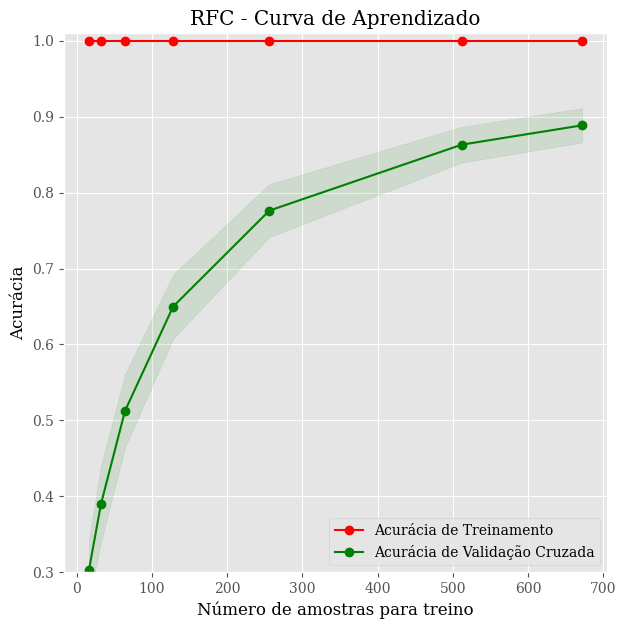

In [324]:
import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'


title = "RFC - Curva de Aprendizado"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plt = plot_learning_curve(estimator, title, X, y, ylim=(0.3, 1.01),
                    cv=cv, n_jobs=4, train_sizes=[16, 32, 64, 128, 256, 512, 672], path = 'RFC_LearningCurve.png')

### II - Confusion Matrix

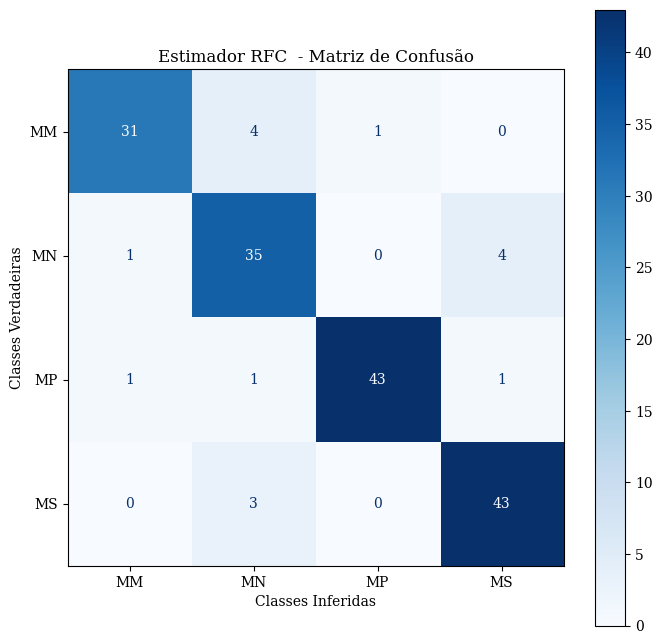

In [325]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import cm
import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(figsize = (8,8), dpi = 100)

y = df["Gait Status"]


X = df_with_pca # Features após a redução de dimensionalidades com PCA


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)


plot_confusion_matrix(rf_classifier, X_test, y_test, cmap = matplotlib.cm.Blues, ax = ax, labels = ["MM", "MN", "MP", "MS"])

ax.set_title("Estimador RFC  - Matriz de Confusão")
ax.set_xlabel("Classes Inferidas")
ax.set_ylabel("Classes Verdadeiras")
ax.grid(False)
fig.savefig('/home/trs/Gait_Project/Documentação/Results/RFC_ConfusionMatrix.png')

# KNeighbors Classifier


In [180]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
predictions = knn_classifier.predict(X_test)
#dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
#dnn_classifier.fit(X_train,y_train)
#predictions = dnn_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[34  2  0  0]
 [12 28  0  0]
 [ 4  0 42  0]
 [ 1  7  0 38]]


              precision    recall  f1-score   support

           0       0.67      0.94      0.78        36
           1       0.76      0.70      0.73        40
           2       1.00      0.91      0.95        46
           3       1.00      0.83      0.90        46

    accuracy                           0.85       168
   macro avg       0.86      0.85      0.84       168
weighted avg       0.87      0.85      0.85       168



In [181]:
scores = cross_val_score(KNeighborsClassifier(), X, y, cv=LeaveOneOut(), scoring= "accuracy")
scores

array([1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [182]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.70)


# Treino e modelos com Deep Learning 

## I - Definição da arquitetura da rede neural profunda direta (FDNN)

In [21]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=4)
print(y_train_categorical)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes = 4)


[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [22]:
from keras import models
from keras import layers
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(1024, activation= 'relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(4, activation='softmax'))

print(model.summary())

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              124928    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4100      
Total params: 2,227,204
Trainable params: 2,227,204
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history = model.fit(X_train,
                    y_train_categorical,
                    epochs=200,
                    batch_size=64,
                    validation_data=(X_test, y_test_categorical))

Epoch 1/200
11/11 [==============================] - 7s 35ms/step - loss: 1.3180 - accuracy: 0.4046 - val_loss: 0.6961 - val_accuracy: 0.7857
Epoch 2/200
11/11 [==============================] - 0s 10ms/step - loss: 0.5755 - accuracy: 0.8179 - val_loss: 0.4522 - val_accuracy: 0.8333
Epoch 3/200
11/11 [==============================] - 0s 10ms/step - loss: 0.2667 - accuracy: 0.9263 - val_loss: 0.3430 - val_accuracy: 0.8750
Epoch 4/200
11/11 [==============================] - 0s 11ms/step - loss: 0.1600 - accuracy: 0.9651 - val_loss: 0.2804 - val_accuracy: 0.8929
Epoch 5/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0842 - accuracy: 0.9841 - val_loss: 0.2462 - val_accuracy: 0.9107
Epoch 6/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0735 - accuracy: 0.9812 - val_loss: 0.2415 - val_accuracy: 0.9048
Epoch 7/200
11/11 [==============================] - 0s 11ms/step - loss: 0.0421 - accuracy: 0.9893 - val_loss: 0.2295 - val_accuracy: 0.8988
Epoch 

Epoch 58/200
11/11 [==============================] - 0s 11ms/step - loss: 2.2498e-04 - accuracy: 1.0000 - val_loss: 0.4497 - val_accuracy: 0.9345
Epoch 59/200
11/11 [==============================] - 0s 11ms/step - loss: 1.7536e-04 - accuracy: 1.0000 - val_loss: 0.4500 - val_accuracy: 0.9345
Epoch 60/200
11/11 [==============================] - 0s 12ms/step - loss: 1.9231e-04 - accuracy: 1.0000 - val_loss: 0.4505 - val_accuracy: 0.9345
Epoch 61/200
11/11 [==============================] - 0s 12ms/step - loss: 1.0494e-04 - accuracy: 1.0000 - val_loss: 0.4503 - val_accuracy: 0.9345
Epoch 62/200
11/11 [==============================] - 0s 11ms/step - loss: 1.2235e-04 - accuracy: 1.0000 - val_loss: 0.4506 - val_accuracy: 0.9345
Epoch 63/200
11/11 [==============================] - 0s 11ms/step - loss: 1.0573e-04 - accuracy: 1.0000 - val_loss: 0.4494 - val_accuracy: 0.9345
Epoch 64/200
11/11 [==============================] - 0s 12ms/step - loss: 1.1030e-04 - accuracy: 1.0000 - val_loss: 0

11/11 [==============================] - 0s 11ms/step - loss: 3.9370e-05 - accuracy: 1.0000 - val_loss: 0.4630 - val_accuracy: 0.9226
Epoch 114/200
11/11 [==============================] - 0s 11ms/step - loss: 4.4948e-05 - accuracy: 1.0000 - val_loss: 0.4635 - val_accuracy: 0.9226
Epoch 115/200
11/11 [==============================] - 0s 11ms/step - loss: 3.8917e-05 - accuracy: 1.0000 - val_loss: 0.4640 - val_accuracy: 0.9226
Epoch 116/200
11/11 [==============================] - 0s 10ms/step - loss: 5.5629e-05 - accuracy: 1.0000 - val_loss: 0.4637 - val_accuracy: 0.9226
Epoch 117/200
11/11 [==============================] - 0s 10ms/step - loss: 4.2778e-05 - accuracy: 1.0000 - val_loss: 0.4635 - val_accuracy: 0.9226
Epoch 118/200
11/11 [==============================] - 0s 11ms/step - loss: 3.3514e-05 - accuracy: 1.0000 - val_loss: 0.4634 - val_accuracy: 0.9226
Epoch 119/200
11/11 [==============================] - 0s 11ms/step - loss: 9.1692e-05 - accuracy: 1.0000 - val_loss: 0.4658 -

11/11 [==============================] - 0s 11ms/step - loss: 1.8197e-05 - accuracy: 1.0000 - val_loss: 0.4760 - val_accuracy: 0.9226
Epoch 169/200
11/11 [==============================] - 0s 11ms/step - loss: 2.3862e-05 - accuracy: 1.0000 - val_loss: 0.4762 - val_accuracy: 0.9226
Epoch 170/200
11/11 [==============================] - 0s 11ms/step - loss: 2.4223e-05 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.9226
Epoch 171/200
11/11 [==============================] - 0s 12ms/step - loss: 1.7680e-05 - accuracy: 1.0000 - val_loss: 0.4745 - val_accuracy: 0.9286
Epoch 172/200
11/11 [==============================] - 0s 11ms/step - loss: 3.4620e-05 - accuracy: 1.0000 - val_loss: 0.4755 - val_accuracy: 0.9226
Epoch 173/200
11/11 [==============================] - 0s 11ms/step - loss: 2.2064e-05 - accuracy: 1.0000 - val_loss: 0.4761 - val_accuracy: 0.9226
Epoch 174/200
11/11 [==============================] - 0s 11ms/step - loss: 2.1720e-05 - accuracy: 1.0000 - val_loss: 0.4766 -

In [24]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=4)
test_loss, test_acc = model.evaluate(X_test,y_test_categorical)
print('test_acc: ',test_acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.9286
test_acc:  0.9285714030265808


## FDNN Model Analysis

### I - Learning Curve

In [26]:
from sklearn.model_selection import learning_curve
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'


In [27]:
title = "FNN - Curva de Aprendizado"
epochs_x = range(1, 200 + 1)
history_dict = history.history

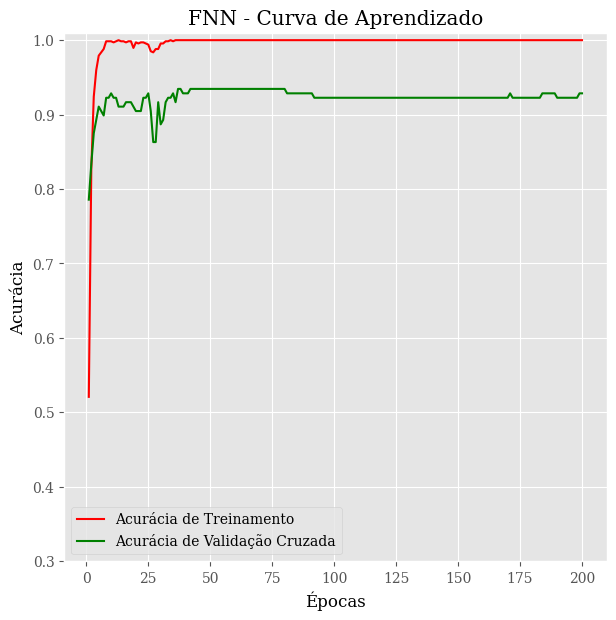

In [28]:
# Accuracy Analysis

fig = plt.figure(figsize = (7,7), dpi = 100)

acc_values     = history_dict['accuracy']

val_acc_values = history_dict['val_accuracy']

plt.plot(epochs_x, acc_values, color = 'r', label = 'Acurácia de Treinamento')
plt.plot(epochs_x, val_acc_values, color = 'g',  label = 'Acurácia de Validação Cruzada')

plt.title(title, color = 'black')
plt.ylim((0.3, 1.01))
plt.xlabel ( "Épocas", color = 'black')
plt.ylabel("Acurácia", color = 'black')

plt.legend()

plt.savefig('/home/rtiagos/PAIC/Gait_Project/Documentação/Results/FNN_LearningCurve.png')

plt.show()


### II - Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'

In [39]:
cm = confusion_matrix(y_test, y_pred)

In [64]:
def tf_plot_confusion_matrix(cm, classes, normalize = False, title = 'Matriz de Confusão', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    Normalization can be applied by setting `normalize=True`
    """
    fig = plt.figure(figsize = (7,7), dpi = 100)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.colorbar()    
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
    
#     plt.tight_layout()
    plt.ylabel("Classes Verdadeiras")
    plt.xlabel("Classes Inferidas")
    fig.savefig('/home/rtiagos/PAIC/Gait_Project/Documentação/Results/FNN_ConfusionMatrix.png')

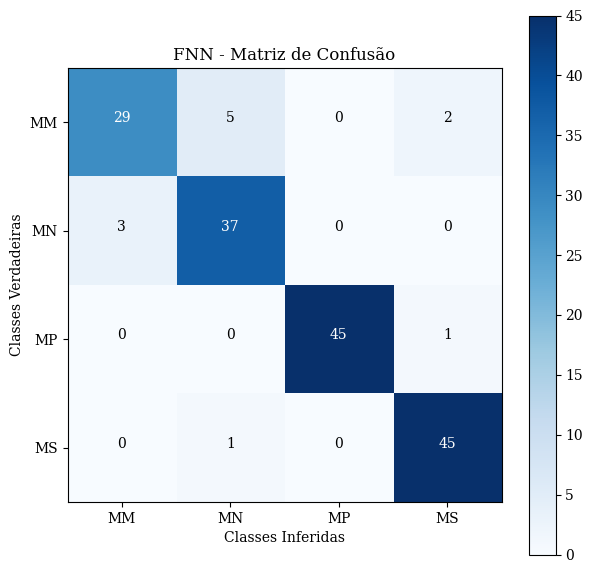

In [65]:
cm_plot_labels = ["MM", "MN", "MP", "MS"]

tf_plot_confusion_matrix (cm = cm, classes = cm_plot_labels, title = "FNN - Matriz de Confusão")

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Classificando toda base de teste
y_pred = model.predict_classes(X_test)
print(y_pred)
print(y_test)
# voltando pro formato de classes
#import numpy as np
#y_pred = np.argmax(y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
target_names = ["MM", "MN", "MP", "MS"]
print(classification_report(y_test, y_pred, target_names=target_names))

[0 1 3 1 3 0 2 3 1 1 2 0 1 1 3 3 3 1 1 1 1 3 0 3 3 2 2 3 2 2 2 2 2 2 2 0 2
 1 1 3 3 2 1 0 3 1 2 1 1 0 3 1 1 3 3 0 2 1 2 1 0 0 3 1 0 1 1 0 0 3 3 2 3 3
 0 1 0 3 1 2 0 3 0 3 2 1 0 3 0 3 0 3 3 3 0 2 2 3 3 3 0 2 2 2 1 1 2 2 3 2 0
 2 2 3 3 0 2 2 2 0 3 2 0 2 3 2 1 2 3 3 2 1 0 1 2 3 1 1 3 3 0 3 0 3 1 2 0 2
 1 2 3 2 1 1 2 2 3 0 1 3 1 1 1 1 3 1 0 2]
[0 1 3 1 3 0 2 3 1 0 2 0 1 1 3 3 2 1 1 1 1 3 0 3 3 2 2 3 2 2 2 2 2 2 2 0 2
 1 0 3 3 2 1 0 3 1 2 3 1 0 3 0 1 3 3 0 2 1 2 1 0 0 3 1 0 1 0 0 0 3 3 2 3 3
 1 1 0 3 1 2 0 3 0 3 2 1 0 3 0 3 0 3 3 3 0 2 2 3 3 3 0 2 2 2 0 1 2 2 3 2 0
 2 2 3 3 0 2 2 2 1 3 2 1 2 3 2 1 2 3 3 2 1 0 1 2 3 1 1 3 0 0 0 0 3 1 2 0 2
 1 2 3 2 1 1 2 2 3 0 1 3 1 1 1 1 3 1 0 2]
Confusion Matrix
[[29  5  0  2]
 [ 3 37  0  0]
 [ 0  0 45  1]
 [ 0  1  0 45]]
Classification Report
              precision    recall  f1-score   support

          MM       0.91      0.81      0.85        36
          MN       0.86      0.93      0.89        40
          MP       1.00      0.98      0.99        46

/home/rtiagos/PAIC/paic_venv/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


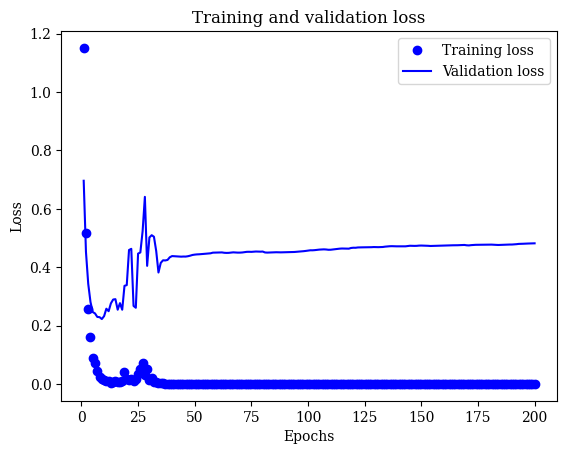

In [53]:
#Vamos ver como foi o treino?
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, 200 + 1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()